<a href="https://colab.research.google.com/github/himanshigarg01/The-Sparks-Foundation-DSBA-/blob/main/GRIPJUNE21_TASK_5_Exploratory_Data_Analysis_Sports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJECTIVE:** Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’.

**By:** Himanshi Garg

**Details:** ● As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team. ● Suggest teams or players a company should endorse for its products.

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
from google.colab import files
uploaded = files.upload()
import io
matches_data = pd.read_csv(io.BytesIO(uploaded['matches.csv']))

from google.colab import files
uploaded = files.upload()
import io
deliveries_data = pd.read_csv(io.BytesIO(uploaded['deliveries.csv']))

Saving matches.csv to matches.csv


Saving deliveries.csv to deliveries.csv


# **Analysis**

In [3]:
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
matches_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
deliveries_data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [7]:
matches_data.shape

(756, 18)

In [8]:
deliveries_data.shape

(179078, 21)

In [9]:
matches_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [10]:
deliveries_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [11]:
print('Matches played so far:', matches_data.shape[0])
print('\n Cities played at:', matches_data['city'].unique())
print('\n Teams participated:', matches_data['team1'].unique())

Matches played so far: 756

 Cities played at: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']

 Teams participated: ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


In [12]:
matches_per_season = matches_data.groupby(['season'])['id'].count().reset_index().rename(columns={'id':'matches'})
matches_per_season

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

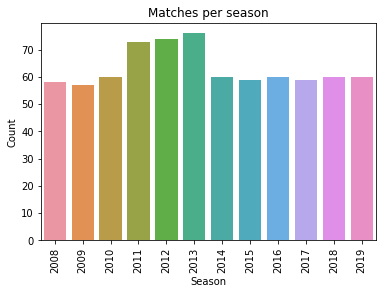

In [13]:
#plotting a bar graph 
sns.countplot(matches_data['season'])
plt.title('Matches per season')
plt.xlabel('Season')
plt.xticks(rotation=90)
plt.ylabel('Count')

Maximum number of matches were played in year 2013.

In [14]:
season_data=matches_data[['id','season']].merge(deliveries_data, left_on='id', right_on='match_id',how='left').drop('id',axis=1)
season_data.head()

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


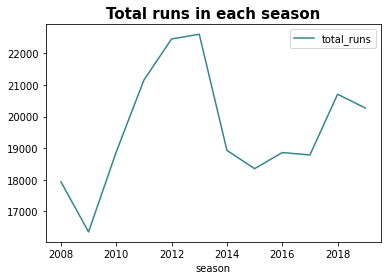

In [15]:
season=season_data.groupby(['season'])['total_runs'].sum().reset_index()
p=season.set_index('season')
ax = plt.axes()
ax.set(facecolor='white')
sns.lineplot(data=p,palette="crest")
plt.title('Total runs in each season', fontsize=15, fontweight='bold')
plt.show()

Maximum runs were scored in year 2013.

winner:                    
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
dtype: int64


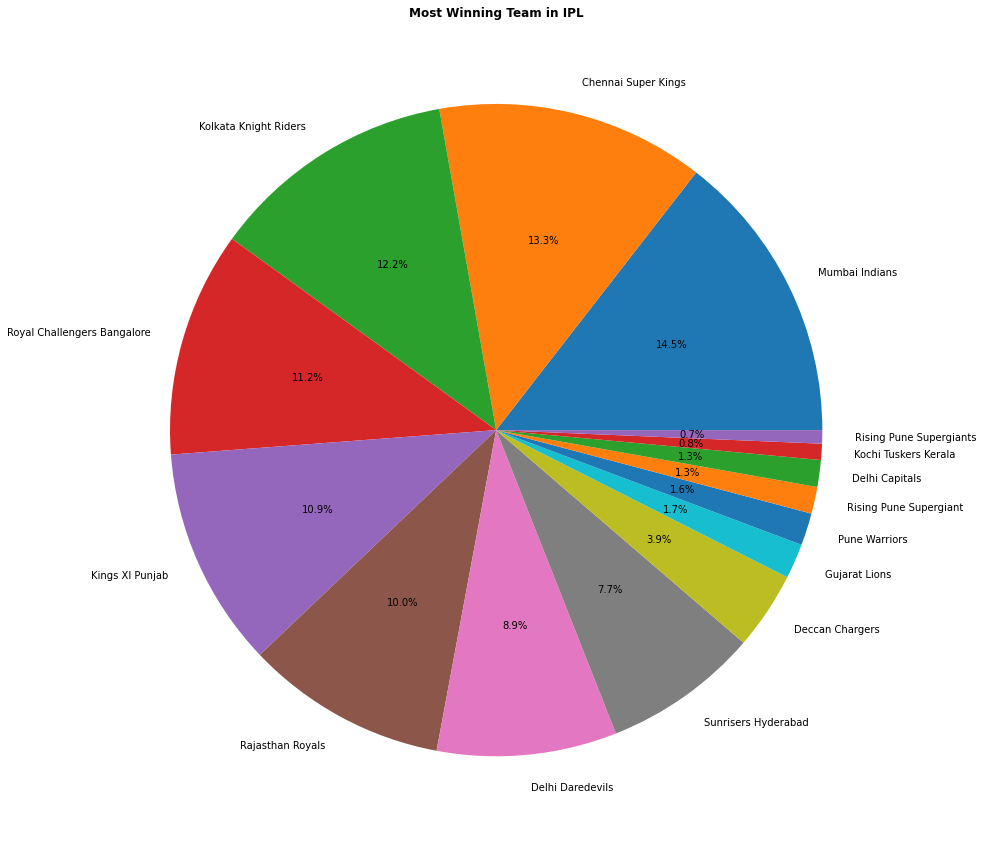

In [16]:
most_wins = pd.DataFrame({'winner:': matches_data['winner']})
count_wins = most_wins.value_counts()
print(count_wins)
labels = [X[0] for X in count_wins.keys()]
plt.subplots(figsize=(20,15))
plt.pie(x=count_wins,autopct= "%.1f%%", labels=labels)
plt.title("Most Winning Team in IPL",fontweight='bold')
plt.show()

Therefore, Mumbai Indians is the most winning in IPL, while Rising Pune Supergiants is the least winning team.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


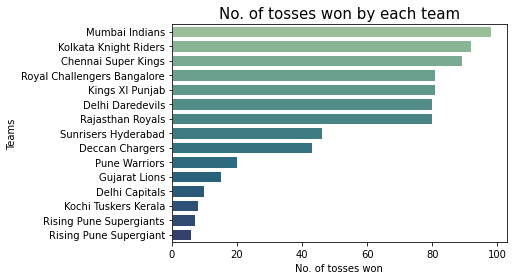

In [17]:
toss=matches_data['toss_winner'].value_counts()
plt.axes().set_facecolor("white")
sns.set(rc={'figure.figsize':(15,10)},style='white')
plt.axes().set_title("No. of tosses won by each team",fontsize=15)
sns.barplot(y=toss.index, x=toss, orient='h', palette='crest')
plt.xlabel('No. of tosses won')
plt.ylabel('Teams')
plt.show()

Mumbai Indians won the maximum number of tosses.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


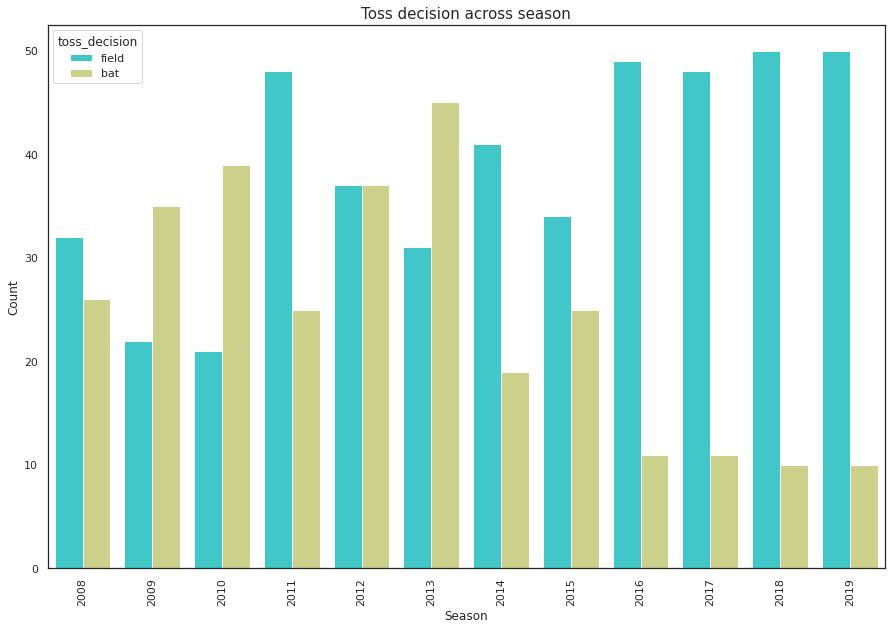

In [18]:
plt.axes().set_facecolor("white")
sns.set(rc={'figure.figsize':(15,10)},style='white')
plt.axes().set_title("Toss decision across season",fontsize=15)
sns.countplot(x='season',hue='toss_decision',data=matches_data, palette='rainbow')
plt.xlabel('Season')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

Over the years, teams choose to field after winning the toss.

In [19]:
matches_data['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

Mostly the result is normal.

In [20]:
matches_data.venue[matches_data.toss_winner=='Mumbai Indians'][matches_data.winner=='Mumbai Indians'].mode()

0    Wankhede Stadium
dtype: object

Best stadium for Mumbai Indians if they win the toss is Wankhede Stadium i.e their home ground.

In [21]:
matches_data.venue[matches_data.toss_winner=='Delhi Capitals'][matches_data.winner=='Delhi Capitals'].mode()

0    Feroz Shah Kotla Ground
dtype: object

Best stadium for Delhi Capitals if they win the toss is Feroz Shah Kotla Ground i.e their home ground.

In [22]:
matches_data.venue[matches_data.toss_winner=='Chennai Super Kings'][matches_data.winner=='Chennai Super Kings'].mode()

0    MA Chidambaram Stadium, Chepauk
dtype: object

Best stadium for Chennai Super Kings if they win the toss is MA Chidambaram Stadium, Chepauk i.e their home ground.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

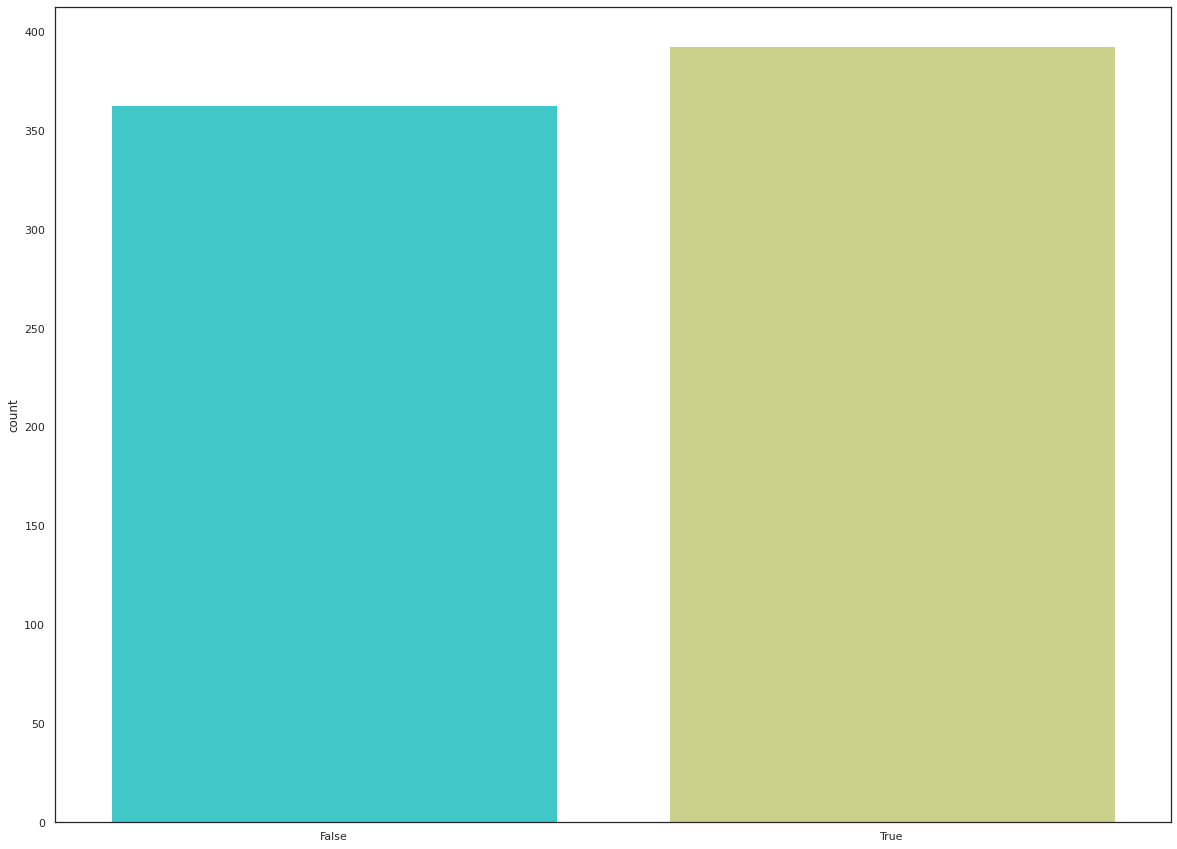

In [23]:
toss = matches_data['toss_winner'] == matches_data['winner']
plt.figure(figsize=(20,15))
sns.countplot(toss, palette='rainbow')
plt.show

Mostly, the toss winner is the match winner.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


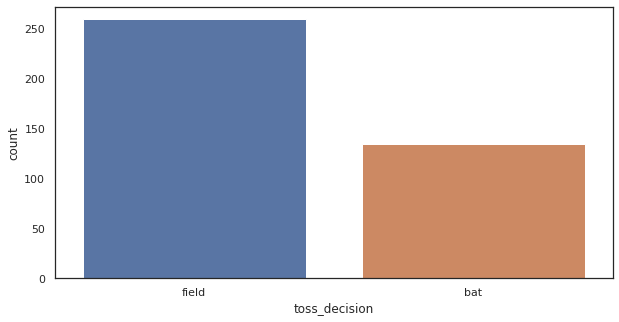

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(matches_data.toss_decision[matches_data.toss_winner == matches_data.winner])
plt.show()

Higher chances of winning a match if the team choose to field first.

In [25]:
matches_data[matches_data['win_by_runs']==matches_data['win_by_runs'].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN


Match details where the result margin or win by runs is max.

In [26]:
runs = deliveries_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns = ['batsman','runs']
y = runs.sort_values(by='runs', ascending=False).head(10).reset_index().drop('index', axis=1)
y

,batsman,runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

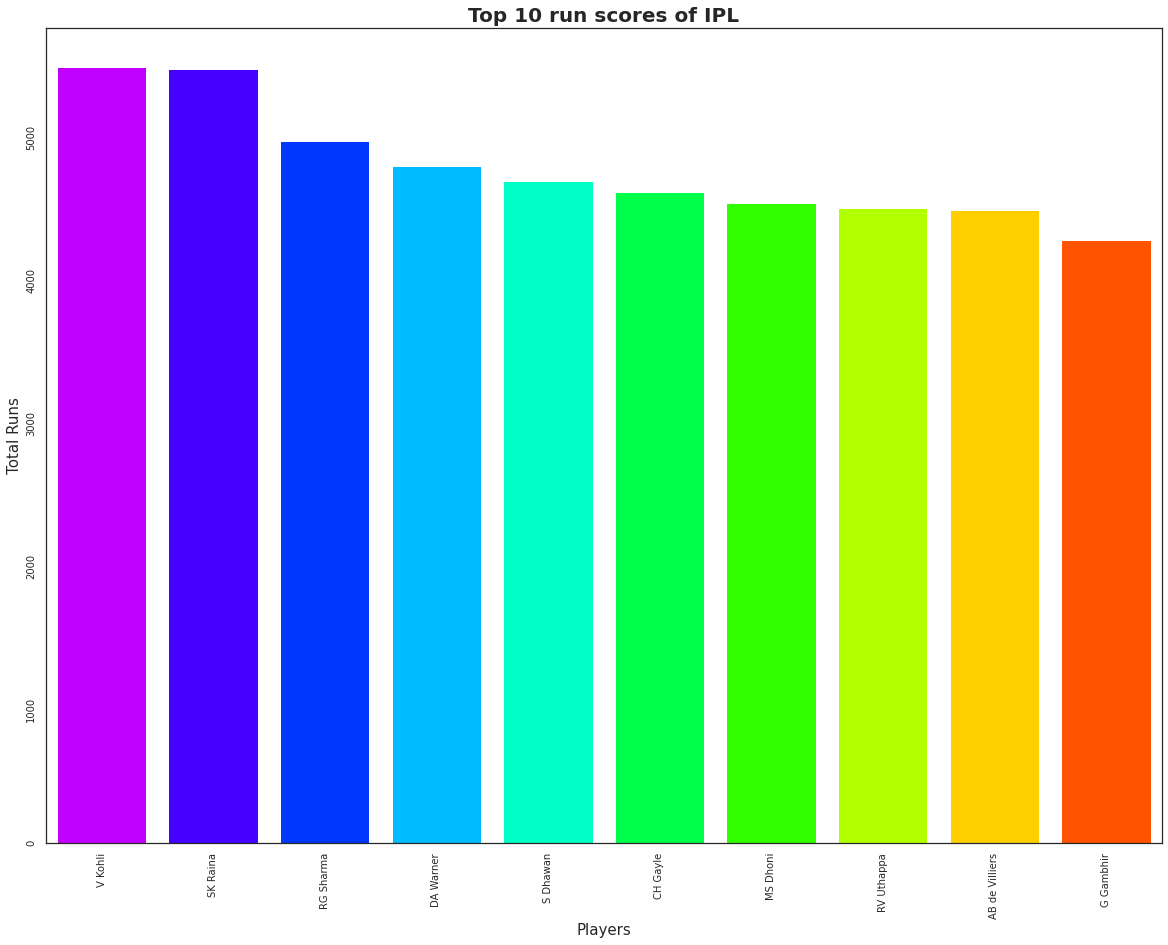

In [27]:
plt.figure(figsize=(20,15))
sns.barplot(x=y['batsman'],y=y['runs'],palette = 'gist_rainbow_r',saturation=1)
plt.title('Top 10 run scores of IPL', fontsize=20,fontweight="bold")
plt.xlabel('Players', fontsize=15)
plt.xticks(rotation=90,fontsize=10)
plt.ylabel('Total Runs', fontsize=15)
plt.yticks(rotation=90,fontsize=10)

V Kohli scores maximum runs in the IPL.

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 <a list of 10 Text major ticklabel objects>)

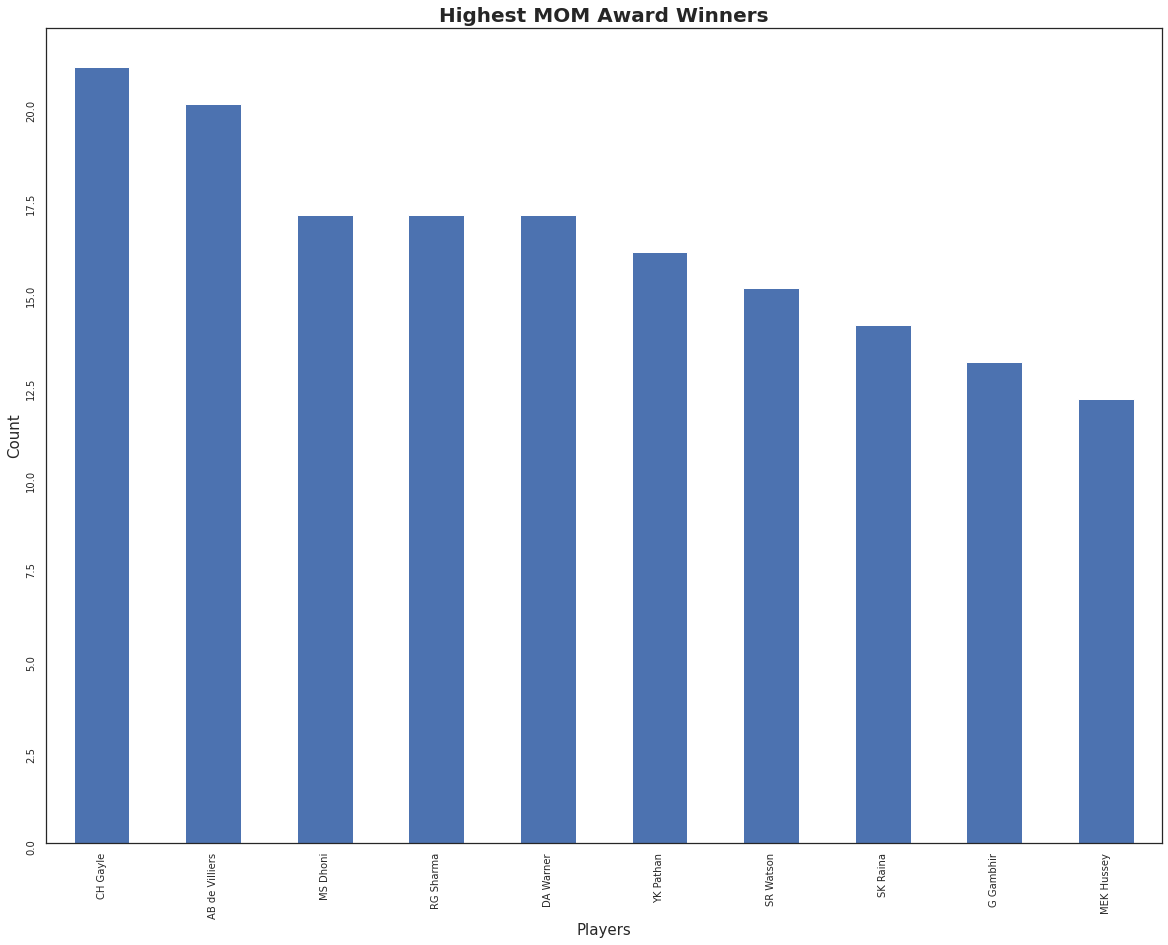

In [28]:
plt.figure(figsize=(20,15))
matches_data.player_of_match.value_counts()[:10].plot(kind='bar')
plt.title('Highest MOM Award Winners', fontsize=20,fontweight="bold")
plt.xlabel('Players', fontsize=15)
plt.xticks(rotation=90,fontsize=10)
plt.ylabel('Count', fontsize=15)
plt.yticks(rotation=90,fontsize=10)

CH Gayle won the maximum number of Man of the Match Awards in IPL, followed by AB de Villiers and MS Dhoni.

###**Analysing Player's Performance**

#### **V Kohli**

In [29]:
player = (deliveries_data['batsman']=='V Kohli')
df_kohli = deliveries_data[player]
df_kohli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2590,12,1,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,CH Gayle,TG Southee,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN
2591,12,1,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
2593,12,1,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2594,12,1,Royal Challengers Bangalore,Mumbai Indians,1,6,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
2597,12,1,Royal Challengers Bangalore,Mumbai Indians,2,1,V Kohli,CH Gayle,Harbhajan Singh,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


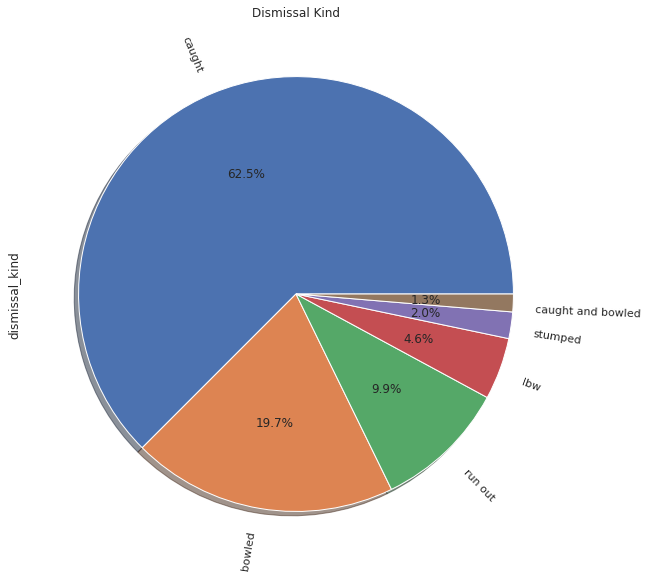

In [30]:
df_kohli['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True) 
plt.title('Dismissal Kind')
plt.show()

V Kohli mostly gets out due catch out.

In [31]:
def count(df_kohli,total_runs):
  return len(df_kohli[df_kohli['batsman_runs']==total_runs])*total_runs

In [32]:
print("Runs scored from 1's :", count(df_kohli,1))
print("Runs scored from 2's :", count(df_kohli,2))
print("Runs scored from 3's :", count(df_kohli,3))
print("Runs scored from 4's :", count(df_kohli,4))
print("Runs scored from 6's :", count(df_kohli,6))

Runs scored from 1's : 1741
Runs scored from 2's : 586
Runs scored from 3's : 33
Runs scored from 4's : 1928
Runs scored from 6's : 1146


V Kohli scored most runs through boundaries.

#### **CH Gayle**

In [33]:
player = (deliveries_data['batsman']=='CH Gayle')
df_gayle = deliveries_data[player]
df_gayle.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
131,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,Mandeep Singh,B Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
132,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,Mandeep Singh,B Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
133,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,Mandeep Singh,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
137,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


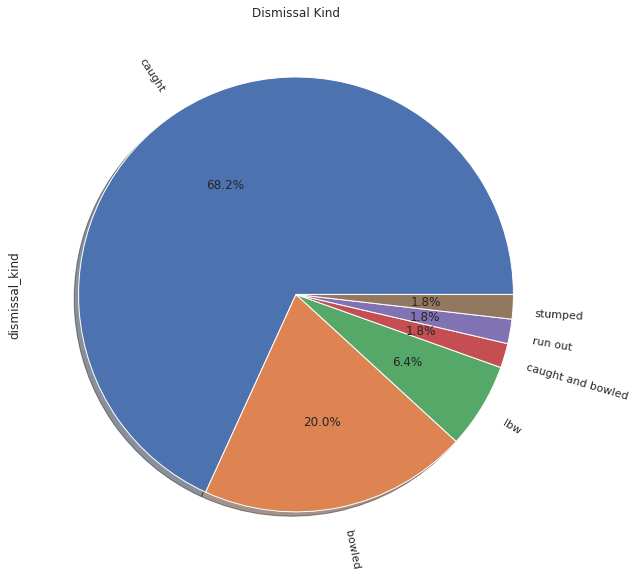

In [34]:
df_gayle['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True) 
plt.title('Dismissal Kind')
plt.show()

CH Gayle mostly gets out due to catch out.

In [35]:
def count(df_gayle,total_runs):
  return len(df_gayle[df_gayle['batsman_runs']==total_runs])*total_runs

In [36]:
print("Runs scored from 1's :", count(df_gayle,1))
print("Runs scored from 2's :", count(df_gayle,2))
print("Runs scored from 3's :", count(df_gayle,3))
print("Runs scored from 4's :", count(df_gayle,4))
print("Runs scored from 6's :", count(df_gayle,6))

Runs scored from 1's : 919
Runs scored from 2's : 166
Runs scored from 3's : 9
Runs scored from 4's : 1504
Runs scored from 6's : 1962


CH Gayle scores most runs through sixes and fours.

#### **MS Dhoni**

In [37]:
player = (deliveries_data['batsman']=='MS Dhoni')
df_dhoni = deliveries_data[player]
df_dhoni.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
469,2,2,Rising Pune Supergiant,Mumbai Indians,16,4,MS Dhoni,SPD Smith,HH Pandya,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
473,2,2,Rising Pune Supergiant,Mumbai Indians,17,2,MS Dhoni,SPD Smith,JJ Bumrah,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
478,2,2,Rising Pune Supergiant,Mumbai Indians,18,1,MS Dhoni,SPD Smith,MJ McClenaghan,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
479,2,2,Rising Pune Supergiant,Mumbai Indians,18,2,MS Dhoni,SPD Smith,MJ McClenaghan,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
482,2,2,Rising Pune Supergiant,Mumbai Indians,18,5,MS Dhoni,SPD Smith,MJ McClenaghan,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


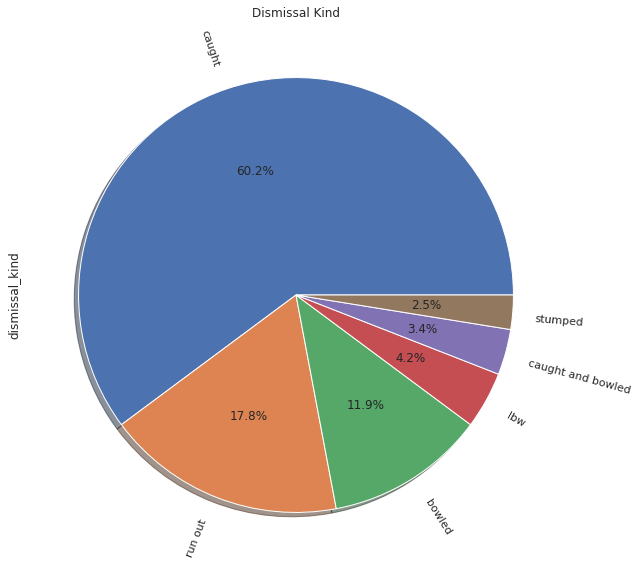

In [38]:
df_dhoni['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True) 
plt.title('Dismissal Kind')
plt.show()

MS Dhoni mostly get out due to catch out.

In [39]:
def count(df_dhoni,total_runs):
  return len(df_dhoni[df_dhoni['batsman_runs']==total_runs])*total_runs

In [40]:
print("Runs scored from 1's :", count(df_dhoni,1))
print("Runs scored from 2's :", count(df_dhoni,2))
print("Runs scored from 3's :", count(df_dhoni,3))
print("Runs scored from 4's :", count(df_dhoni,4))
print("Runs scored from 6's :", count(df_dhoni,6))

Runs scored from 1's : 1383
Runs scored from 2's : 608
Runs scored from 3's : 42
Runs scored from 4's : 1188
Runs scored from 6's : 1242


MS Dhoni scores most runs from singles and then from 6's.

**Conclusion:**
1. Most number of matches were played in 2013. Also, maximum runs were scored in 2013.
2. Most successful team of IPL is Mumbai Indians, whereas Rising Pune Supergiants is least successful.
3. A team has maximum chances of winning the match when its in there home ground.
4. Most teams choose to field after winning the toss. Also, there is a higher chance of winning the match if the team choose to field first.
5. Toss winner team has a sligthly higher chance of winning the match.
6. Player who scored maximum runs is Virat Kohli followed by Suresh Raina. So, companies should endorse these players.
7. Players who got most number of Man of the Match Awards are Chris Gayle, AB de Villiers and MS Dhoni. Companies can also endorse these players for its products.
8. V Kohli, CH Gayle and MS Dhoni are more likely to get out because of Catch Out.
9. * V Kohli scored most runs through boundaries.
   * CH Gayle scores most runs through sixes and fours.
   * MS Dhoni scores most runs from singles and then from 6's.





**THE END**

---

